# Heart Attacks in Youth vs Adult Nigerians
## This notebook seeks to create a model to detect if heart attacks are likely to happen to a youth or adult

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.feature_selection import chi2

In [3]:
data = pd.read_csv('heart_attack_youth_vs_adult_nigeria.csv')

In [4]:
data.describe()

,BMI
count,898796.000000
mean,27.502941
std,7.220324
min,15.000000
25%,21.200000
50%,27.500000
75%,33.800000
max,40.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898796 entries, 0 to 898795
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   State                  898796 non-null  object 
 1   Age_Group              898796 non-null  object 
 2   Gender                 898796 non-null  object 
 3   BMI                    898796 non-null  float64
 4   Smoking_Status         898796 non-null  object 
 5   Alcohol_Consumption    673208 non-null  object 
 6   Exercise_Frequency     898796 non-null  object 
 7   Hypertension           898796 non-null  object 
 8   Diabetes               898796 non-null  object 
 9   Cholesterol_Level      898796 non-null  object 
 10  Family_History         898796 non-null  object 
 11  Stress_Level           898796 non-null  object 
 12  Diet_Type              898796 non-null  object 
 13  Heart_Attack_Severity  898796 non-null  object 
 14  Hospitalized           898796 non-nu

In [6]:
data.head()

,State,Age_Group,Gender,BMI,Smoking_Status,Alcohol_Consumption,Exercise_Frequency,Hypertension,Diabetes,Cholesterol_Level,Family_History,Stress_Level,Diet_Type,Heart_Attack_Severity,Hospitalized,Survived,Income_Level,Urban_Rural,Employment_Status
0,Ondo,Youth,Female,34.5,Non-Smoker,High,Occasionally,No,Yes,Borderline,Yes,Low,Unhealthy,Mild,No,Yes,Medium,Urban,Employed
1,FCT,Youth,Male,15.2,Non-Smoker,High,Occasionally,No,Yes,High,No,Moderate,Unhealthy,Mild,Yes,No,High,Rural,Employed
2,Borno,Youth,Female,25.0,Non-Smoker,High,Weekly,No,Yes,High,No,Moderate,Mixed,Moderate,Yes,No,Medium,Rural,Student
3,Katsina,Youth,Male,19.7,Non-Smoker,High,Occasionally,No,No,High,Yes,High,Healthy,Mild,Yes,No,Low,Rural,Unemployed
4,Kaduna,Adult,Female,35.6,Non-Smoker,Low,Rarely,No,Yes,High,Yes,High,Healthy,Moderate,No,Yes,Low,Rural,Student


In [7]:
ohecolumns = ['Age_Group', 'Gender', 'Smoking_Status', 'Family_History', 'Hypertension', 'Diabetes', 'Hospitalized', 'Survived', 'Employment_Status']

In [8]:
data2 = pd.get_dummies(data, columns=ohecolumns, drop_first=True)

In [9]:
data2.head()

,State,BMI,Alcohol_Consumption,Exercise_Frequency,Cholesterol_Level,Stress_Level,Diet_Type,Heart_Attack_Severity,Income_Level,Urban_Rural,Age_Group_Youth,Gender_Male,Smoking_Status_Smoker,Family_History_Yes,Hypertension_Yes,Diabetes_Yes,Hospitalized_Yes,Survived_Yes,Employment_Status_Student,Employment_Status_Unemployed
0,Ondo,34.5,High,Occasionally,Borderline,Low,Unhealthy,Mild,Medium,Urban,True,False,False,True,False,True,False,True,False,False
1,FCT,15.2,High,Occasionally,High,Moderate,Unhealthy,Mild,High,Rural,True,True,False,False,False,True,True,False,False,False
2,Borno,25.0,High,Weekly,High,Moderate,Mixed,Moderate,Medium,Rural,True,False,False,False,False,True,True,False,True,False
3,Katsina,19.7,High,Occasionally,High,High,Healthy,Mild,Low,Rural,True,True,False,True,False,False,True,False,False,True
4,Kaduna,35.6,Low,Rarely,High,High,Healthy,Moderate,Low,Rural,False,False,False,True,False,True,False,True,True,False


In [10]:

data2[['Alcohol_Consumption', 'Exercise_Frequency', 'Cholesterol_Level', 'Stress_Level', 'Heart_Attack_Severity', 'Income_Level', 'Urban_Rural', 'Diet_Type']] = data2[['Alcohol_Consumption', 'Exercise_Frequency', 'Cholesterol_Level', 'Stress_Level', 'Heart_Attack_Severity', 'Income_Level','Urban_Rural', 'Diet_Type']].apply(LabelEncoder().fit_transform) 

In [11]:
data2.head()

,State,BMI,Alcohol_Consumption,Exercise_Frequency,Cholesterol_Level,Stress_Level,Diet_Type,Heart_Attack_Severity,Income_Level,Urban_Rural,Age_Group_Youth,Gender_Male,Smoking_Status_Smoker,Family_History_Yes,Hypertension_Yes,Diabetes_Yes,Hospitalized_Yes,Survived_Yes,Employment_Status_Student,Employment_Status_Unemployed
0,Ondo,34.5,0,1,0,1,2,0,2,1,True,False,False,True,False,True,False,True,False,False
1,FCT,15.2,0,1,1,2,2,0,0,0,True,True,False,False,False,True,True,False,False,False
2,Borno,25.0,0,3,1,2,1,1,2,0,True,False,False,False,False,True,True,False,True,False
3,Katsina,19.7,0,1,1,0,0,0,1,0,True,True,False,True,False,False,True,False,False,True
4,Kaduna,35.6,1,2,1,0,0,1,1,0,False,False,False,True,False,True,False,True,True,False


In [12]:
data2[['Age_Group_Youth', 'Gender_Male', 'Smoking_Status_Smoker', 'Family_History_Yes', 'Hypertension_Yes','Diabetes_Yes','Hospitalized_Yes', 'Survived_Yes','Employment_Status_Student','Employment_Status_Unemployed']] = data2[['Age_Group_Youth', 'Gender_Male', 'Smoking_Status_Smoker', 'Family_History_Yes', 'Hypertension_Yes','Diabetes_Yes','Hospitalized_Yes', 'Survived_Yes','Employment_Status_Student','Employment_Status_Unemployed']].astype('int')

In [13]:
data2.head()

,State,BMI,Alcohol_Consumption,Exercise_Frequency,Cholesterol_Level,Stress_Level,Diet_Type,Heart_Attack_Severity,Income_Level,Urban_Rural,Age_Group_Youth,Gender_Male,Smoking_Status_Smoker,Family_History_Yes,Hypertension_Yes,Diabetes_Yes,Hospitalized_Yes,Survived_Yes,Employment_Status_Student,Employment_Status_Unemployed
0,Ondo,34.5,0,1,0,1,2,0,2,1,1,0,0,1,0,1,0,1,0,0
1,FCT,15.2,0,1,1,2,2,0,0,0,1,1,0,0,0,1,1,0,0,0
2,Borno,25.0,0,3,1,2,1,1,2,0,1,0,0,0,0,1,1,0,1,0
3,Katsina,19.7,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1
4,Kaduna,35.6,1,2,1,0,0,1,1,0,0,0,0,1,0,1,0,1,1,0


In [14]:
Y = data2['Survived_Yes']
X = data2.drop(columns=['Survived_Yes'])

In [15]:
chi2_results = chi2(X.drop('State', axis=1), Y)

In [16]:
chi2_table = pd.DataFrame(chi2_results, columns=X.drop('State', axis=1).columns, index=['Chi2', 'p-value'])

In [17]:
chi2_table.head()

,BMI,Alcohol_Consumption,Exercise_Frequency,Cholesterol_Level,Stress_Level,Diet_Type,Heart_Attack_Severity,Income_Level,Urban_Rural,Age_Group_Youth,Gender_Male,Smoking_Status_Smoker,Family_History_Yes,Hypertension_Yes,Diabetes_Yes,Hospitalized_Yes,Employment_Status_Student,Employment_Status_Unemployed
Chi2,0.004495,5.277763,4.032866,2.949595,1.033002,0.005993,1.497845,0.321883,2.328710,3.134508,1.447701,2.077562,1.326569,0.398626,0.836594,1.141184,0.305081,0.386446
p-value,0.946544,0.021599,0.044622,0.085899,0.309455,0.938295,0.221003,0.570478,0.127007,0.076652,0.228897,0.149479,0.249417,0.527800,0.360373,0.285402,0.580715,0.534173


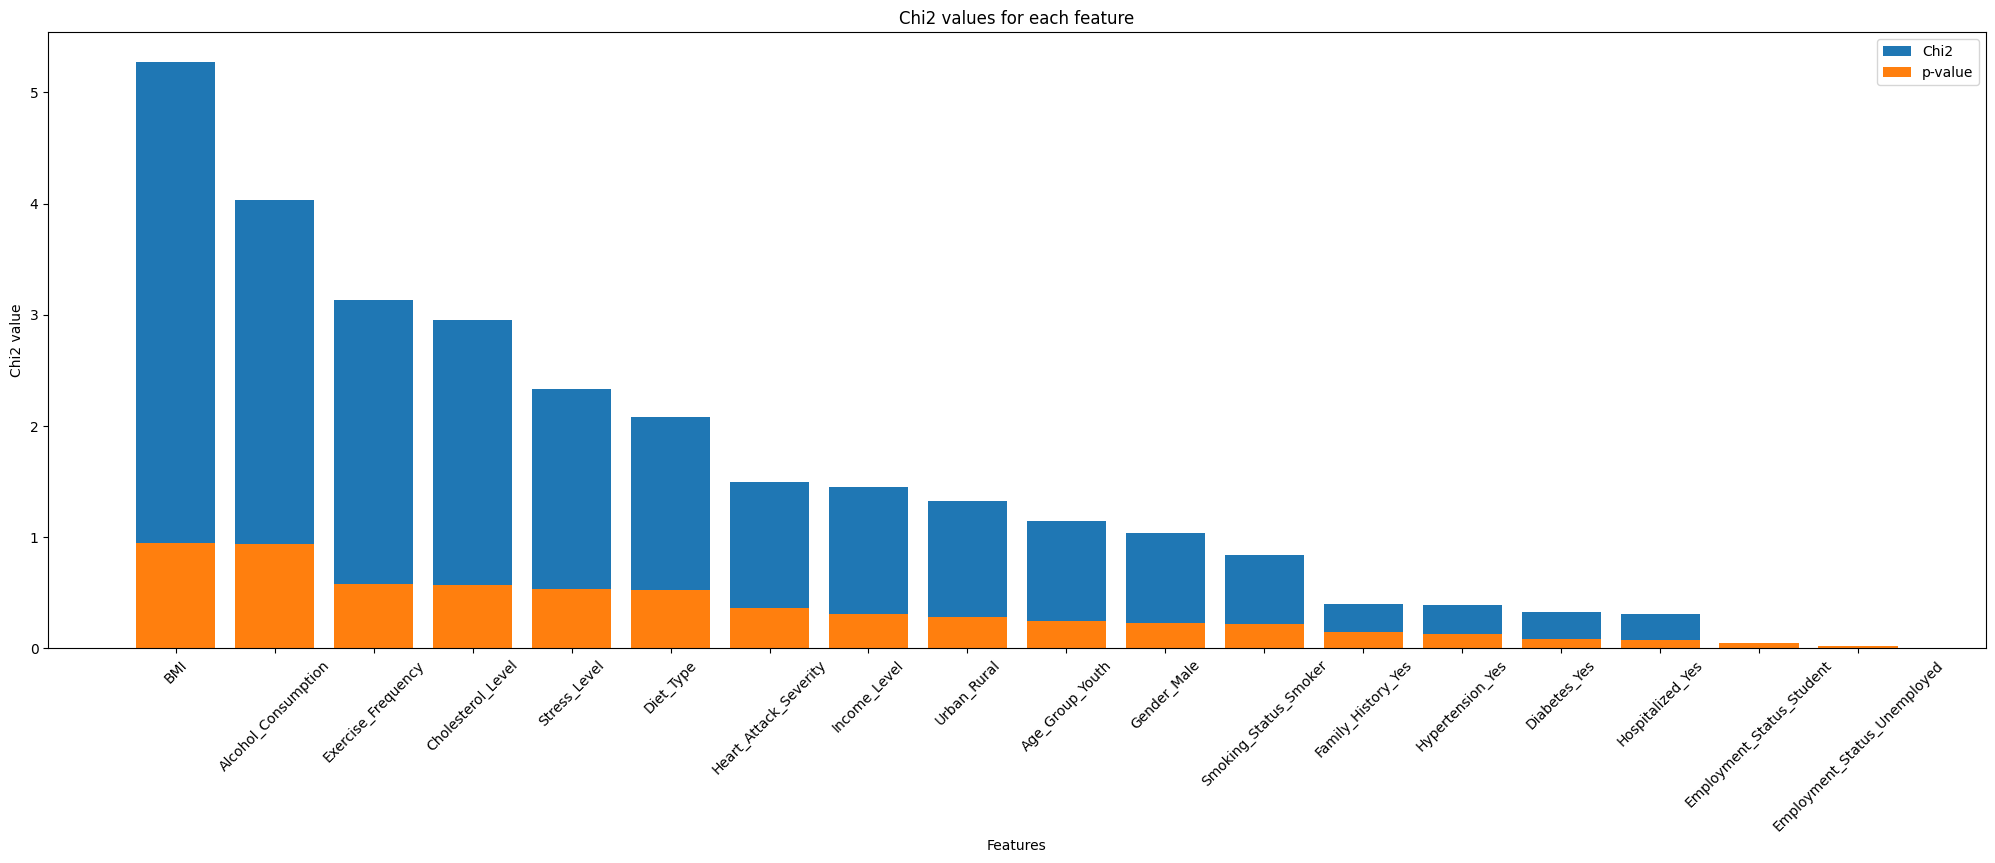

In [18]:
# bar plot of chi2 values sorted by chi2 value in descending order excluding State
plt.figure(figsize=(25, 8))
plt.bar(chi2_table.columns, chi2_table.loc['Chi2'].sort_values(ascending=False))
plt.bar(chi2_table.columns, chi2_table.loc['p-value'].sort_values(ascending=False))
plt.xticks(rotation=45)
plt.title('Chi2 values for each feature')
plt.xlabel('Features')
plt.ylabel('Chi2 value')
plt.legend(['Chi2', 'p-value'])


In [63]:
chi2_tableT = chi2_table.T
sigcols = chi2_tableT[chi2_tableT['Chi2']>2].T.columns

In [65]:
#columns to train model on
sigcols

Index(['Alcohol_Consumption', 'Exercise_Frequency', 'Cholesterol_Level',
       'Urban_Rural', 'Age_Group_Youth', 'Smoking_Status_Smoker'],
      dtype='object')

In [69]:
lgr = LogisticRegression(n_jobs=-1)

In [70]:
xtrain, xtest, ytrain, ytest = train_test_split(X[sigcols], Y, test_size=0.2, random_state=42)

In [71]:
lgr.fit(xtrain, ytrain)

LogisticRegression(n_jobs=-1)

In [76]:
trainpred = lgr.predict(xtrain)

<Axes: >

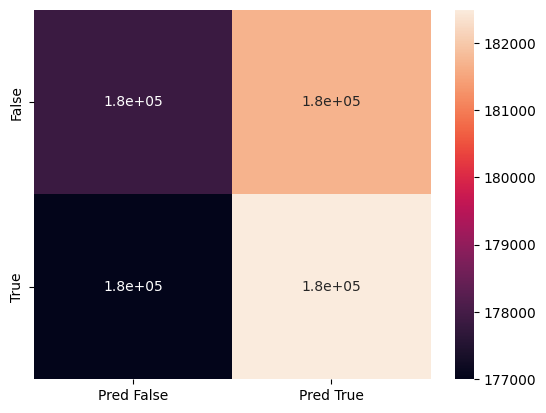

In [84]:
sns.heatmap(confusion_matrix(ytrain, trainpred), annot=True,xticklabels=['Pred False', 'Pred True'], yticklabels=['False', 'True'])

In [90]:
report1 = classification_report(ytrain, trainpred)
print(report1)

              precision    recall  f1-score   support

           0       0.50      0.49      0.50    359542
           1       0.50      0.51      0.50    359494

    accuracy                           0.50    719036
   macro avg       0.50      0.50      0.50    719036
weighted avg       0.50      0.50      0.50    719036



In [91]:
testpred = lgr.predict(xtest)
print(classification_report(ytest, testpred))

              precision    recall  f1-score   support

           0       0.51      0.50      0.50     90357
           1       0.50      0.51      0.51     89403

    accuracy                           0.50    179760
   macro avg       0.50      0.50      0.50    179760
weighted avg       0.50      0.50      0.50    179760

